In [1]:
!kaggle datasets download -d noordeen/insurance-premium-prediction

  0%|                                               | 0.00/13.4k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 13.4k/13.4k [00:00<00:00, 63.7MB/s]


In [2]:
!unzip insurance-premium-prediction.zip -d data_input

Archive:  insurance-premium-prediction.zip
  inflating: data_input/insurance.csv  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./data_input//insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

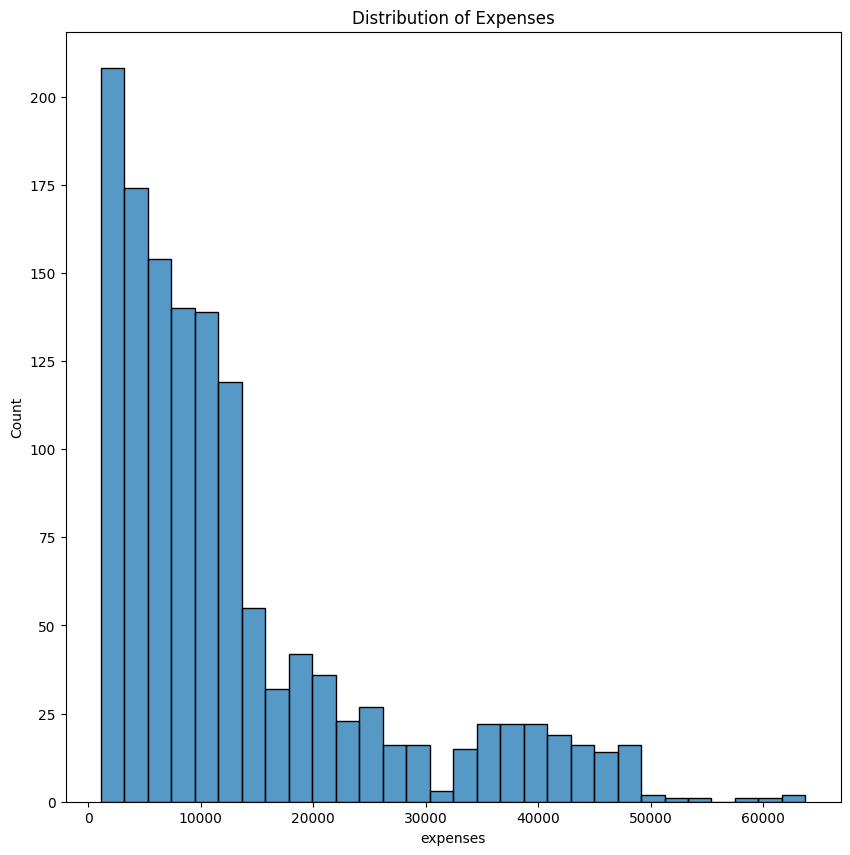

In [8]:
plt.figure(figsize=(10, 10))
sns.histplot(df['expenses'], kde=True)
plt.title('Distribution of Expenses')
plt.show()